Vanilla Autoencoder

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
    ])

transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define the input dimension and the hidden dimension
input_dim = 784  # Assuming input images of size 28x28
hidden_dim = 100

# Create an instance of the Autoencoder
autoencoder = Autoencoder(input_dim, hidden_dim)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)
dataloader = torch.utils.data.DataLoader(dataset=mnist_data,batch_size=64,shuffle=True)
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data in dataloader:
        # Forward pass
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)
        outputs = autoencoder(inputs)

        # Compute the loss
        loss = criterion(outputs, inputs)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


100%|██████████| 9912422/9912422 [00:00<00:00, 98519008.56it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 34219122.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26117710.54it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2033140.74it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.0069
Epoch [2/10], Loss: 0.0065
Epoch [3/10], Loss: 0.0064
Epoch [4/10], Loss: 0.0058
Epoch [5/10], Loss: 0.0065
Epoch [6/10], Loss: 0.0058
Epoch [7/10], Loss: 0.0060
Epoch [8/10], Loss: 0.0062
Epoch [9/10], Loss: 0.0066
Epoch [10/10], Loss: 0.0064


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Plotting the initial images before passing through the encoder-decoder

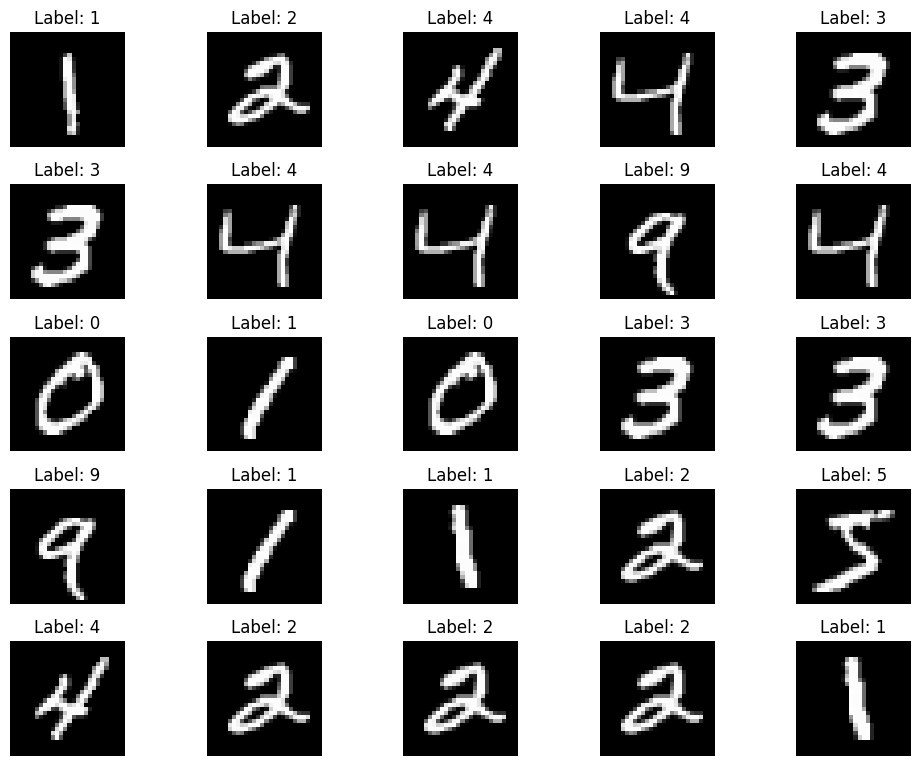

In [ ]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(mnist_data,batch_size=10,shuffle=False)

examples = enumerate(test_dataloader)
batch_idx, (example_data, example_targets) = next(examples)

examples_idx = np.random.randint(0,high=len(example_data),size=25)
fig = plt.figure(figsize=(10,8))
rows, cols = 5,5

for i,j in enumerate(examples_idx):
  fig.add_subplot(rows,cols,i+1)
  plt.tight_layout()
  plt.imshow(example_data[j][0],cmap='gray')
  plt.title("Label: %g" %example_targets[j])
  plt.axis('off')
plt.show()

Images of the dataset after passing through the encoder-decoder

(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)


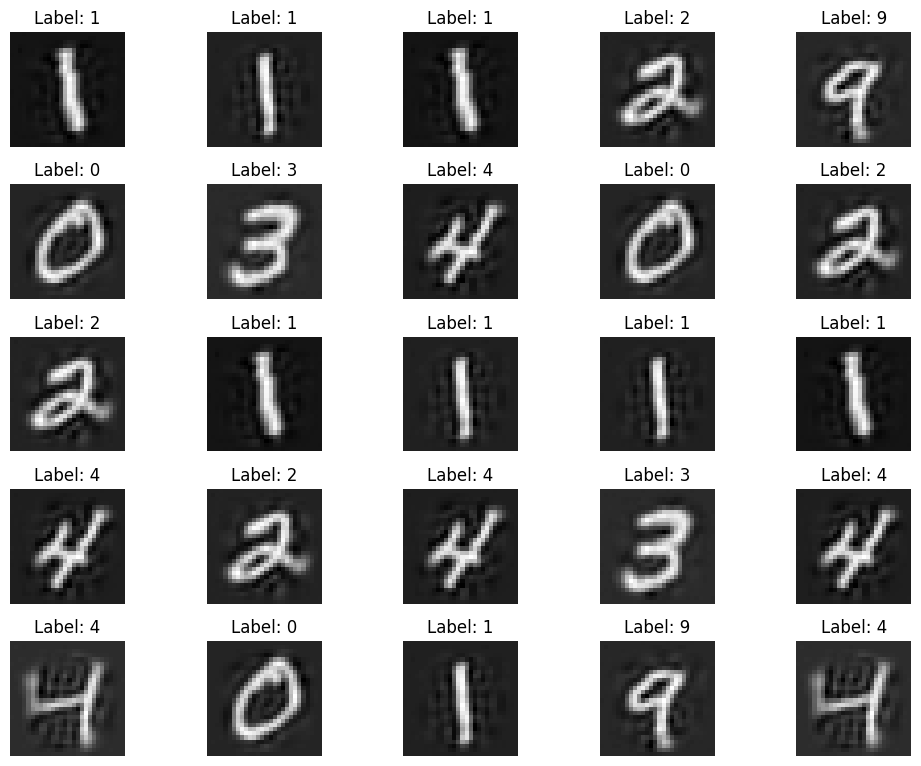

In [ ]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(mnist_data,batch_size=10,shuffle=False)

examples = enumerate(test_dataloader)
batch_idx, (example_data, example_targets) = next(examples)


inputs = example_data
inputs = inputs.view(inputs.size(0), -1)
outputs = autoencoder(inputs)
outputs = outputs.detach().numpy()

examples_idx = np.random.randint(0,high=len(example_data),size=25)
fig = plt.figure(figsize=(10,8))
rows, cols = 5,5

for i,j in enumerate(examples_idx):
  fig.add_subplot(rows,cols,i+1)
  plt.tight_layout()
  print(outputs[j].shape)
  plt.imshow(outputs[j].reshape(28,28),cmap='gray')
  plt.title("Label: %g" %example_targets[j])
  plt.axis('off')
plt.show()

References:

* Official Documentation of Pytorch

* AI based General Purpose Technology